In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "pictures/"
CATEGORIES = ["Bishop", "Knight", "Pawn", "Queen", "Rook"]

In [16]:
def create_data():
    training_data = []
    for category in CATEGORIES:
        path = DATADIR + category
        category_index = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(path + '/' + img, cv2.IMREAD_GRAYSCALE)
            img_resized = cv2.resize(img_array, (128, 128))
            training_data.append([img_resized, category_index])
    return training_data

In [17]:
training_data = create_data()

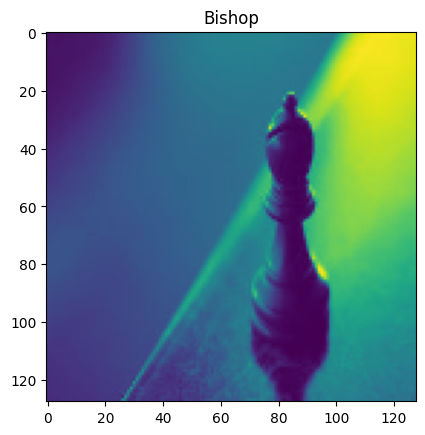

In [18]:
index_test = 48
plt.imshow(training_data[index_test][0])
plt.title(CATEGORIES[training_data[index_test][1]])
plt.show()

In [19]:
import random

# to mix the data
random.shuffle(training_data)

In [20]:
X = [] # the X_training
Y = [] # the Y_training

In [21]:
for pixels, category in training_data:
    X.append(pixels)
    Y.append(category)

In [22]:
X = np.array(X)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
Y = np.array(Y)
print(X.shape)
print(Y.shape)

(651, 128, 128, 1)
(651,)


In [23]:
import tensorflow as tf
X = tf.keras.utils.normalize(X, axis = 1)

In [24]:
split_size = int(0.8 * X.shape[0])

X_train = X[:split_size, :]
X_test = X[split_size:, :]

Y_train = Y[:split_size]
Y_test = Y[split_size:]

In [25]:
print(X.shape[1:])

(128, 128, 1)


In [31]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=X.shape[1:]))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(len(CATEGORIES), activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\khiro\OneDrive\Documents\Py\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 61, 61, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,741 (14.10 MB)

 Trainable params: 3,696,741 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - accuracy: 0.2305 - loss: 1.6309
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - accuracy: 0.2807 - loss: 1.5624
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - accuracy: 0.2951 - loss: 1.5309
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - accuracy: 0.3627 - loss: 1.4426
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - accuracy: 0.4635 - loss: 1.3401
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - accuracy: 0.5125 - loss: 1.2363
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 177ms/step - accuracy: 0.5651 - loss: 1.1493
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - accuracy: 0.5610 - loss: 1.1119
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step - accuracy: 0.6615 - loss: 0.9081
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step - accuracy: 0.6856 - loss: 0.8655
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step - accuracy: 0.7527 - loss: 0.7770
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step

In [33]:
val_acc, val_loss = model.evaluate(X_train, Y_train)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9337 - loss: 0.2336


In [34]:
predictions = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


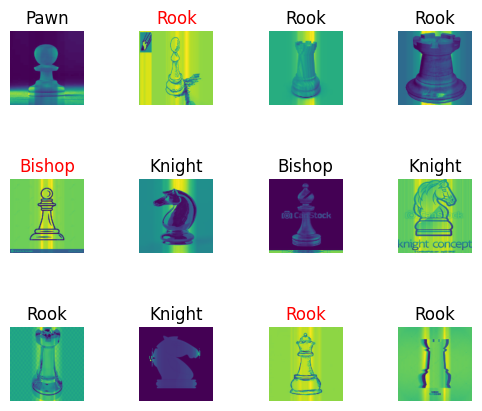

0.25 false values


In [37]:
x = 90
y = x+12
# printing some pictures of the x_test and it's predictions as title
false_values = 0
for i in range(x, y):
    plt.subplot(3, 4, i-x+1)
    plt.subplots_adjust(hspace=1)
    plt.imshow(X_test[i])
    plt.axis('off')
    color = 'black'
    if np.argmax(predictions[i]) != Y_test[i]:
        false_values = false_values + 1
        color = 'red'
    plt.title(CATEGORIES[np.argmax(predictions[i])], color=color)
plt.show()

print(false_values/12,'false values')